# Gerekli Kütüphane ve Fonksiyonlar

In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### Veri Seti Hikayesi ve Problem: Şeker Hastalığı Tahmini

In [8]:
df = pd.read_csv("./diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Lojistik Regresyon (Logistic Regression)

### Model & Tahmin

In [12]:
df["Outcome"].value_counts() #bağımlı değişkenimiz

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [44]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
 X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [47]:
loj_model = LogisticRegression(solver = "liblinear").fit(X, y)

In [48]:
loj_model.intercept_

array([-5.86838449])

In [49]:
loj_model.coef_

array([[ 1.17007007e-01,  2.83251556e-02, -1.69249455e-02,
         7.59355798e-04, -6.37219033e-04,  5.95065841e-02,
         6.73389509e-01,  7.16944013e-03]])

In [50]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
 y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [52]:
y_pred = loj_model.predict(X)

In [53]:
confusion_matrix(y, y_pred) #karmaşıklık matrisi

array([[448,  52],
       [121, 147]], dtype=int64)

In [54]:
accuracy_score(y, y_pred)#doğruluk oranı, başarılı yaptığımız işler bölü tüm durum.

0.7747395833333334

In [55]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [56]:
loj_model.predict_proba(X)[0:10] #1-0 değeri olarak değil de direk olasılık değerlerini görmek için kullanılır.

array([[0.35117681, 0.64882319],
       [0.91661941, 0.08338059],
       [0.22505944, 0.77494056],
       [0.92090951, 0.07909049],
       [0.16843926, 0.83156074],
       [0.79839197, 0.20160803],
       [0.87952231, 0.12047769],
       [0.27731711, 0.72268289],
       [0.32072832, 0.67927168],
       [0.92223457, 0.07776543]])

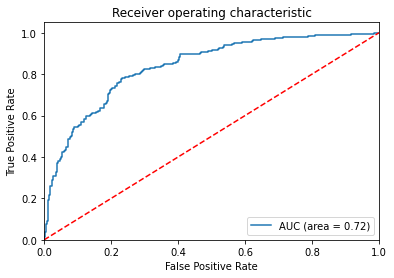

In [57]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X)) #roc eğrisi model başarısını değerlendirmek üzere bilgi verir.  
fpr, tpr, theresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

### Model Tuning (Model Doğrulama)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [59]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train, y_train)

In [60]:
y_pred = loj_model.predict(X_test)

In [61]:
print(accuracy_score(y_test, y_pred)) #hiper parametrelerin optimum sonuçlarına ulaşmak için kullanıyoruz.

0.7532467532467533


In [62]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

## K-En Yakın Komşu (KNN)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Model & Tahmin

In [65]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [66]:
knn_model

KNeighborsClassifier()

In [67]:
y_pred = knn_model.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn_params = {"n_neighbors": np.arange(1,50)} #1den 50ye kadar k değerlerimizi oluşturmuş olduk.

In [77]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [79]:
knn_cv_model.best_score_

0.748637316561845

In [80]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [81]:
#final

In [82]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [83]:
y_pred = knn_tuned.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [85]:
knn_tuned.score(X_test, y_test) #üsttekiyle aynı işlem

0.7316017316017316

## Destek Vektör Makineleri (SVM))

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Model & Tahmin

In [101]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [103]:
svm_model

SVC(kernel='linear')

In [104]:
y_pred = svm_model.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred)

0.7445887445887446

### Model Tuning

In [109]:
svm = SVC()

In [110]:
svm_params = {"C":np.arange(1,10), "kernel":["linear", "rbf"]}

In [111]:
svm_cv_model = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.8min finished


In [113]:
svm_cv_model.best_score_

0.7839044652128765

In [114]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [112]:
#final

In [115]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [116]:
y_pred = svm_tuned.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Yapay Sinir Ağları

In [120]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [152]:
scaler = StandardScaler()

In [154]:
scaler.fit(X_train)
X_train =scaler.transform(X_train)

In [155]:
scaler.fit(X_test)
X_train =scaler.transform(X_test)

### Model & Tahmin

In [123]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [124]:
mlpc_model.coefs_

[array([[-1.02269134e-01, -4.09936681e-02, -2.63628382e-02,
          2.22729941e-01, -1.13085174e-01, -1.39154071e-01,
         -2.15423537e-01,  5.97392213e-02, -1.27073394e-01,
          1.28252034e-01,  1.77372730e-01,  9.45577158e-03,
         -4.78368312e-02,  3.74857580e-02, -1.17872241e-01,
         -7.45702157e-02, -2.86033732e-02, -9.56758999e-03,
          2.19738734e-01,  5.76023876e-02,  2.15999658e-01,
          1.51701775e-01, -1.52225334e-01, -2.09300413e-01,
          1.15207234e-01, -2.12776051e-01,  2.08210584e-05,
         -1.16166343e-01,  1.55605490e-01, -2.28471852e-01,
          4.76705372e-02,  2.39695945e-01,  3.77228659e-02,
         -1.33215895e-03,  3.22429130e-01, -5.84433242e-02,
         -1.94680673e-02, -9.21290958e-02,  3.36703097e-02,
         -2.68706087e-02, -7.64096791e-02,  1.13934122e-01,
          2.18270871e-01,  4.30067752e-02,  1.15645791e-01,
         -3.68173775e-02,  1.99444806e-01,  1.23259046e-01,
          1.10825800e-01,  2.10818325e-0

In [125]:
?mlpc_model 

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\zeynep\anaconda33\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default=

In [126]:
#doğrusal bir fonksiyon için relu activation, sınıflandırma fonksiyonu için logistic activation kullanıyoruz.
#solver modelimizde kullanmış olduğumuz ağırlıkları optimize etmek için kullanılacak olan yöntemi ifade eder.

In [127]:
y_pred = mlpc_model.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred)

0.7316017316017316

### Model Tuning

In [156]:
mlpc_params = {"alpha":[1,5,0.1,0.01,0.3,0.05,0.0001],
               "hidden_layer_sizes": [(10,10),(100,100,100),(100,100),(3,5)]#yapay sinir ağı modelinin ağ mimari yapısı ile ilgili değerleri
              }#hidden_layer_sizes'da parantez içerisindeki değişken sayısı kaç katmanlı olduğunu gösterir.

In [157]:
mlpc = MLPClassifier(solver="lbfgs", activation = "logistic") #solver= çözücü yaklaşımımız

In [159]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [231, 537]

In [160]:
mlpc_cv_model

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1,
             param_grid={'alpha': [1, 5, 0.1, 0.01, 0.3, 0.05, 0.0001],
                         'hidden_layer_sizes': [(10, 10), (100, 100, 100),
                                                (100, 100), (3, 5)]},
             verbose=2)

In [161]:
mlpc_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (100, 100)}

In [ ]:
#finalmodel

In [149]:
mlpc_tuned = MLPClassifier(solver = "lbfgs", activation = 'logistic', alpha = 0.5, hidden_layer_sizes = (100,100)).fit(X_train, y_train)

C:\Users\Zeynep\anaconda33\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [150]:
y_pred = mlpc_tuned.predict(X_test)

In [151]:
accuracy_score(y_test, y_pred)

0.7012987012987013

## CART (Classification and Regession Tree)

In [163]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Model & Tahmin

In [166]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [167]:
cart_model

DecisionTreeClassifier()

In [168]:
y_pred = cart_model.predict(X_test)

In [169]:
accuracy_score(y_test, y_pred)

0.696969696969697

### Model Tuning

In [172]:
cart = DecisionTreeClassifier()

In [175]:
cart_params = {"max_depth": [1,3,5,8,10],
               "min_samples_split": [1,3,5,10,20,50]}

In [176]:
cart_cv_model = GridSearchCV(cart, cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.8s finished


In [177]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [178]:
# final model

In [179]:
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train, y_train)

In [180]:
y_pred = cart_tuned.predict(X_test)

In [181]:
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forest

### Model & Tahmin

In [184]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [185]:
rf_model #random forestta iki konuya odaklanıyoruz. birincisi aç tane ağaç oluşturmak gerektiği ikincisi bölünmelerde göz önünde bulundurulması gereken değişken sayısına karar vermek. harici max derinlik sayısı, mix_samples_leaf, min_samples_split.

RandomForestClassifier()

In [186]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

### Model Tuning

In [187]:
X_train.shape

(537, 8)

In [188]:
rf = RandomForestClassifier()

In [190]:
rf_params = {"n_estimators": [100,200,500,1000], #oluşturulacak olan ağaç sayısını ifade eder.
             "max_features": [3,5,7,8], #bölünmelerde göz önünde bulundurulması gereken max değişken sayısını ifade eder.
             "min_samples_split": [2,5,10,20]}

In [191]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.7min finished


In [192]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 200}

### final model

In [193]:
rf_tuned = RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500).fit(X_train, y_train)

In [194]:
y_pred = rf_tuned.predict(X_test)

In [195]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [197]:
#değişken önem düzeyleri

In [196]:
rf_tuned

RandomForestClassifier(max_features=8, min_samples_split=5, n_estimators=500)

In [198]:
rf_tuned.feature_importances_

array([0.04827948, 0.37414548, 0.07548512, 0.04555532, 0.05315274,
       0.1609638 , 0.10821509, 0.13420296])

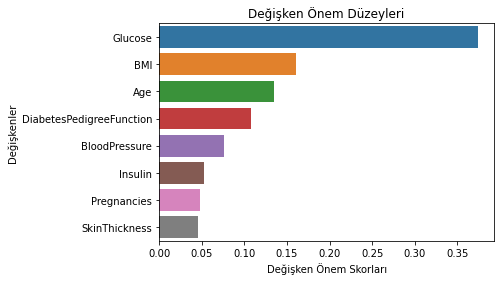

In [200]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## Gradient Boosting Machines

### Model & Tahmin

In [201]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [202]:
gbm_model

GradientBoostingClassifier()

In [203]:
#loss gerçek değerler ile tahmin edilen değerler arasındaki farkı nasıl optimize edicez gibi çözmek için kullanılan değer 
#learning_rate öğrenme oranı, her bir ağacın etkilerini ifade ediyor.
#criterion bölünmelere karar vermek adına kullanılır.
#min_samples_split bölünme için gerekli olan min örnek sayısını ifade eder.

In [204]:
y_pred = gbm_model.predict(X_test)

In [206]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [207]:
#Model Tuning

In [208]:
gbm = GradientBoostingClassifier()

In [209]:
gbm_params = {"learning_rate": [0.1,0.01,0.001,0.05],
              "n_estimators": [100,200,500,1000],
              "max_depth": [2,3,5,8]}

In [213]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.6min finished


In [214]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

### final model

In [216]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [217]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

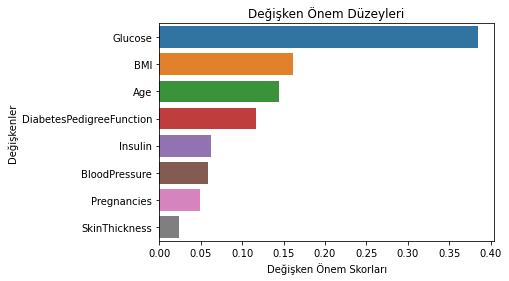

In [219]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## XGBoost

### Model & Tahmin

In [224]:
!pip install xgboost

  Using cached xgboost-1.3.3.tar.gz (781 kB)
  Running setup.py clean for xgboost
Failed to build xgboost
    Running setup.py install for xgboost: started
    Running setup.py install for xgboost: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Zeynep\anaconda33\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Zeynep\\AppData\\Local\\Temp\\pip-install-zt36fa0l\\xgboost\\setup.py'"'"'; __file__='"'"'C:\\Users\\Zeynep\\AppData\\Local\\Temp\\pip-install-zt36fa0l\\xgboost\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Zeynep\AppData\Local\Temp\pip-wheel-vs3vguy1'
       cwd: C:\Users\Zeynep\AppData\Local\Temp\pip-install-zt36fa0l\xgboost\
  Complete output (973 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win32-3.8
  creating build\lib.win32-3.8\xgboost
  copying xgboost\callback.py -> build\lib.win32-3.8\xgboost
  copying xgboost\compat.py -> build\lib.win32-3.8\xgboost
  copying xgboost\core.py -> build\lib.win32-3.8

In [230]:
!conda install -c conda-foge xgboost


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-foge
  channel url: https://conda.anaconda.org/conda-foge
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [223]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [ ]:
?xgb_model

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
#Model Tuning

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_params = {"n_estimators": [100,500,1000],
              "subsample": [0.6,0.8,1], #göz önünde bulunduralacak örneklem oranını ifade eder.
              "max_depth": [3,5,7],
              "learning_rate": [0.1,0.001,0.01]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
xgb_tuned =XGBClassifier(learning_rate=0.001, max_depth= 7, n_estimators=500, subsample=0.6).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y_feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## Light GBM

### Model & Tahmin

In [227]:
!pip install lightgbm

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Zeynep\anaconda33\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Zeynep\\AppData\\Local\\Temp\\pip-install-u2tg8jbr\\lightgbm\\setup.py'"'"'; __file__='"'"'C:\\Users\\Zeynep\\AppData\\Local\\Temp\\pip-install-u2tg8jbr\\lightgbm\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Zeynep\AppData\Local\Temp\pip-wheel-1y2eu64g'
       cwd: C:\Users\Zeynep\AppData\Local\Temp\pip-install-u2tg8jbr\lightgbm\
  Complete output (53 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\lightgbm
  copying lightgbm\basic.py -> build\lib\lightgbm
  copying lightgbm\callback.py -> build\lib\lightgbm
  copying lightgbm\compat.py -> build\lib\lightgbm
  copying lightgbm\engine.py ->


  Running setup.py clean for lightgbm
Failed to build lightgbm
    Running setup.py install for lightgbm: started
    Running setup.py install for lightgbm: finished with status 'error'


In [229]:
!conda install -c conda-foge lightgbm


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-foge
  channel url: https://conda.anaconda.org/conda-foge
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
?lgbm_model

In [ ]:
#boosting_type farklı modelleme tekniklerinin seçilebileceğini ifade eder.

In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

### Model Tuning

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],
               "n_estimators": [200,500,1000],
               "max_depth": [1,2,3,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y_feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## CatBoost

### Model & Tahmin

In [233]:
!pip install catboost

ERROR: Could not find a version that satisfies the requirement catboost (from versions: none)
ERROR: No matching distribution found for catboost


## Tüm Modellerin Karşılaştırılması

In [244]:
modeller =[
          knn_tuned,
          loj_model,
          svm_tuned,
          mlpc_tuned,
          cart_tuned,
          rf_tuned,
          gbm_tuned]
sonuc = []
sonuclar = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

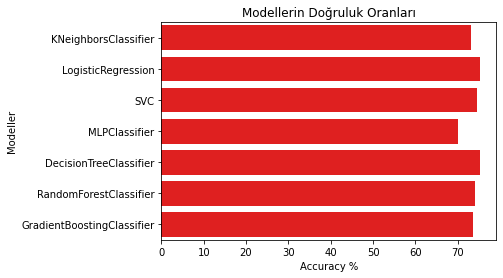

In [245]:
sns.barplot(x='Accuracy',y='Modeller', data=sonuclar, color='r')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [247]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,73.160173
0,LogisticRegression,75.324675
0,SVC,74.458874
0,MLPClassifier,70.129870
0,DecisionTreeClassifier,75.324675
0,RandomForestClassifier,74.025974
0,GradientBoostingClassifier,73.593074


## Daha Başka Ne Yapılabilir?